# Keras Project - Iris Flower Identification
The objective of the project is to use the Iris dataset to identify the 3 different classes of flowers from the 4 given features using Deep Learning models in the Keras library

##### About the Dataset
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), and 150 records under five attributes - sepal length, sepal width, petal length, petal width and species. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

# Importing the required Modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

# Loading the Iris dataset

In [2]:
iris = load_iris()

# Splitting the data

In [3]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the Model in Keras

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(300, input_shape=(4,), activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(400, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(3, activation="softmax")
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               1500      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               40400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

# Compiling the Model

In [7]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the Model

In [8]:
history = model.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 1.2475 - accuracy: 0.3429
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7753 - accuracy: 0.6095
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6017 - accuracy: 0.7619
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7810
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8000
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8857
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8667
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8857
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8762
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9048
Epoch 11/

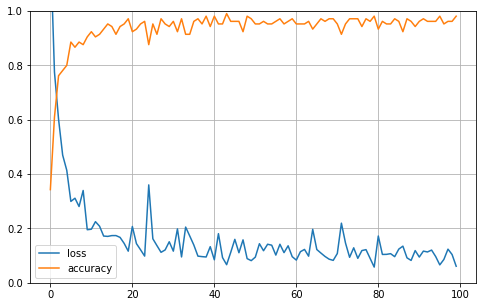

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluate the Model

In [10]:
results = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9778


In [11]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.035564
Final test set accuracy: 0.977778


# View the Predictions

In [12]:
class_names = iris.target_names
X_new = X_test[:5]

In [18]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
#y_pred = np.round(y_pred).astype(int)
print(np.array(class_names)[y_pred])

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']


In [19]:
y_new = y_test[:5]
print(np.array(class_names)[y_new])

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor']
